# Análisis exploratorio de datos
Insturcciones:
EDA (análisis exploratorio de datos): previo a la fase de modelado, deberá realizarse un
EDA sobre el dataset seleccionado. Este debe cumplir con:

a) Plantear tres (3) preguntas de su interés. Estas preguntas deben ser “preguntas
complejas”, utilizar el mismo criterio aplicado al Proyecto 1 del curso.

b) En un único notebook, definir dichas preguntas y proceder a encontrar la
respuesta utilizando las herramientas de manipulación y análisis de datos vistas
en clase.

c) Trabajar de forma ordenada el notebook, utilizando una combinación de celdas
de código y celdas de markdown.

d) Una de las preguntas debe tener una respuesta gráfica, acompañada de su
interpretación correspondiente.

e) Este notebook debe subirse al repositorio con el nombre eda.ipynb y encontrarse
en el primer nivel de la estructura de archivos del repositorio. Asegurarse que el
notebook pueda resetearse y volverse a ejecutar (run all) sin ningún
inconveniente.

*Exploración incial de la data antes de las preguntas...*

- Cargar el data set y revisar su tamaño y estructura

In [1]:
import gdown
import pandas as pd

fileID = '1jZZvMTUfZ1wmrBJ3f9pJBEKmYEKaBhzl'
url = f"https://drive.google.com/uc?id={fileID}"

In [2]:
output = "gamesWcategoricas.csv"  # Nombre del archivo local donde se guardará
gdown.download(url, output, quiet=False)

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?id=1jZZvMTUfZ1wmrBJ3f9pJBEKmYEKaBhzl
From (redirected): https://drive.google.com/uc?id=1jZZvMTUfZ1wmrBJ3f9pJBEKmYEKaBhzl&confirm=t&uuid=0ad48a59-20f5-4bcc-a06f-c51c6d1c0b4d
To: c:\Users\javic\OneDrive\Documentos\GitHub\ProyectoDataScience\gamesWcategoricas.csv
100%|██████████| 468M/468M [00:22<00:00, 20.9MB/s] 
C:\Users\javic\AppData\Local\Temp\ipykernel_15100\1306599052.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output)


In [3]:
print(f"Cantidad de observaciones: {df.shape[0]}")
print(f"Cantidad de columnas (features): {df.shape[1]}")

# Información general: tipos de dato, columnas, nulls, etc.
df.info()


Cantidad de observaciones: 111452
Cantidad de columnas (features): 765
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Columns: 765 entries, AppID to Spoken_zulu
dtypes: bool(3), float64(2), int64(747), object(13)
memory usage: 648.3+ MB


- Resumen estadístico de las columnas numéricas

In [4]:
# Estadísticas descriptivas (solo columnas numéricas)
df.describe()


,AppID,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,...,Spoken_urdu,Spoken_uyghur,Spoken_uzbek,Spoken_valencian,Spoken_vietnamese,Spoken_welsh,Spoken_wolof,Spoken_xhosa,Spoken_yoruba,Spoken_zulu
count,1.114520e+05,111452.000000,1.114520e+05,1.114520e+05,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,1.114520e+05,...,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000
mean,1.716972e+06,2020.849056,9.826266e+04,1.777215e+02,0.254208,7.061568,0.449530,2.623354,0.030408,7.543525e+02,...,0.005814,0.005724,0.005787,0.005689,0.012508,0.005733,0.005689,0.005724,0.005733,0.006128
std,9.203859e+05,3.158731,1.264098e+06,8.390462e+03,2.035653,12.563246,12.006677,13.736245,1.565136,2.139410e+04,...,0.076029,0.075443,0.075854,0.075208,0.111136,0.075502,0.075208,0.075443,0.075502,0.078043
min,1.000000e+01,1997.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.362550e+05,2019.000000,2.000000e+04,0.000000e+00,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.665065e+06,2022.000000,2.000000e+04,0.000000e+00,0.000000,3.990000,0.000000,0.000000,0.000000,3.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.453585e+06,2023.000000,2.000000e+04,1.000000e+00,0.000000,9.990000,0.000000,0.000000,0.000000,2.900000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.671840e+06,2025.000000,2.000000e+08,1.311366e+06,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(df.columns.tolist())


['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DiscountDLC count', 'About the game', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Screenshots', 'Movies', 'language_afrikaans', 'language_albanian', 'language_amharic', 'language_arabic', 'language_armenian', 'language_assamese', 'language_azerbaijani', 'language_bangla', 'language_basque', 'language_belarusian', 'language_bosnian', 'language_bulgarian', 'language_catalan', 'language_cherokee', 'language_croatian', 'language_czech', 'language_danish', 'language_dari', 'language_dutch', 'language_english', 'language_estonian', 'language_filipino', 'language_finnish', 'lang

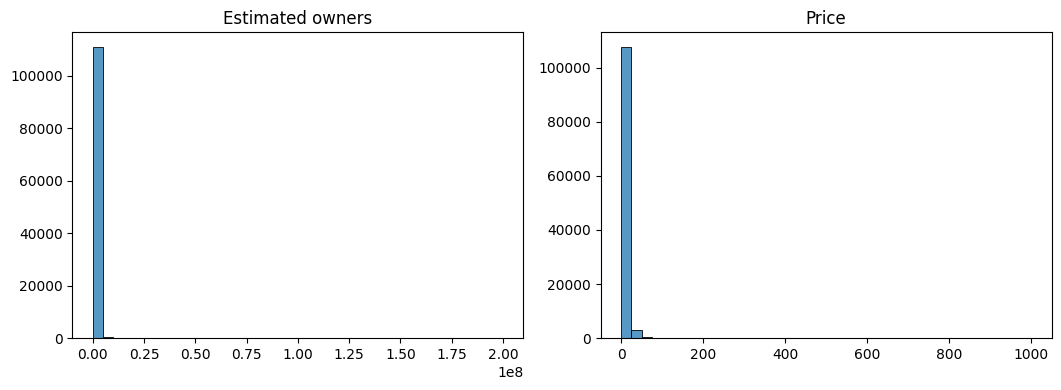

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficas de variables importantes (sin modificar datos)
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
sns.histplot(df['Estimated owners'], bins=40)
plt.title("Estimated owners")
plt.xlabel("")
plt.ylabel("")

plt.subplot(1, 3, 2)
sns.histplot(df['Price'], bins=40)
plt.title("Price")
plt.xlabel("")
plt.ylabel("")

# plt.subplot(1, 3, 3)
# sns.histplot(df['Peak_CCU'], bins=40)
# plt.title("Peak CCU")
# plt.xlabel("")
# plt.ylabel("")

plt.tight_layout()
plt.show()


## Preguntas de interés

### 1) pregunta 
Como es que la cantidad de propietarios, en los juegos de educacion, cambia al estar el juego o no en ingles?


In [7]:
# Filtrar solo juegos educativos
education_games = df[df['genre_education'] == 1]

# Agrupar por soporte de inglés y calcular métricas clave
resultados = education_games.groupby('language_english')['Estimated owners'].agg(
    ['mean', 'median', 'count', 'std']
)

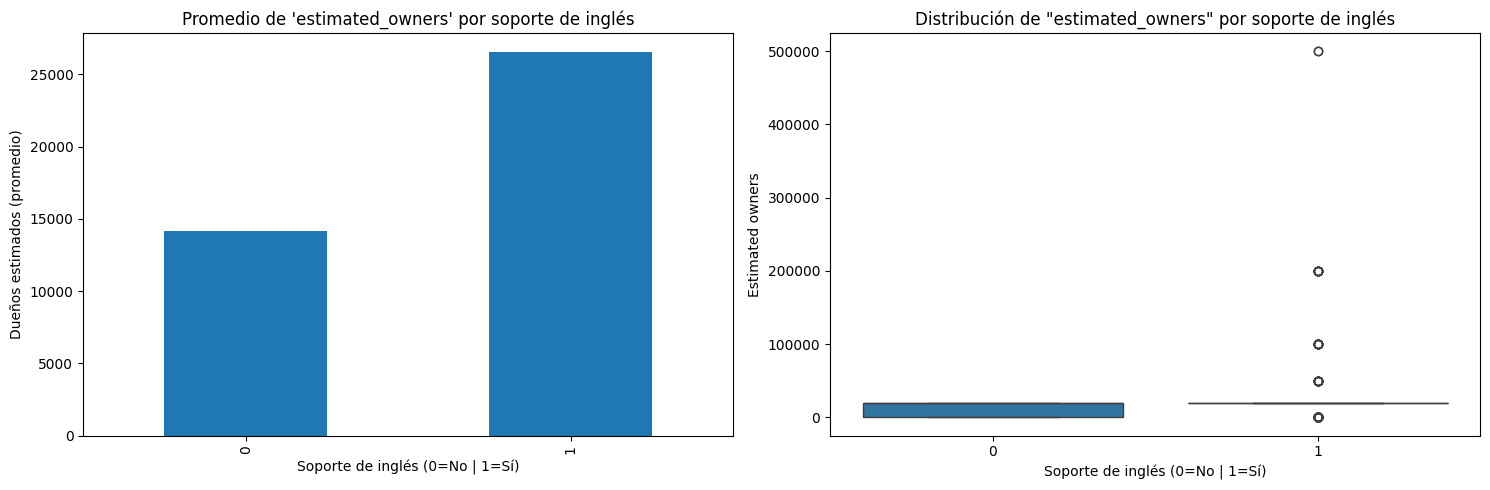

In [8]:
# Visualización comparativa
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras (promedio)
resultados['mean'].plot(kind='bar', title="Promedio de 'estimated_owners' por soporte de inglés", ax=ax[0])
ax[0].set_xlabel('Soporte de inglés (0=No | 1=Sí)')
ax[0].set_ylabel('Dueños estimados (promedio)')

# Gráfico de boxplot
sns.boxplot(data=education_games, x='language_english', y='Estimated owners', ax=ax[1])
ax[1].set_title('Distribución de "estimated_owners" por soporte de inglés')
ax[1].set_xlabel('Soporte de inglés (0=No | 1=Sí)')

plt.tight_layout()
plt.show()

In [9]:
# Mostrar resultados numéricos
print("Resumen estadístico para juegos educativos:\n")
print(resultados.round(2))

Resumen estadístico para juegos educativos:

                      mean   median  count       std
language_english                                    
0                 14166.67  20000.0     24   9286.11
1                 26548.46  20000.0    423  44561.07


### 2) pregunta 

In [10]:
#aqui la segunda

### 3) pregunta 

In [11]:
#y la tercera